# Assignment 1
## Name - Pranav Gupta
## Roll No. - 2021101095

### 1. Lenna's Plight

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

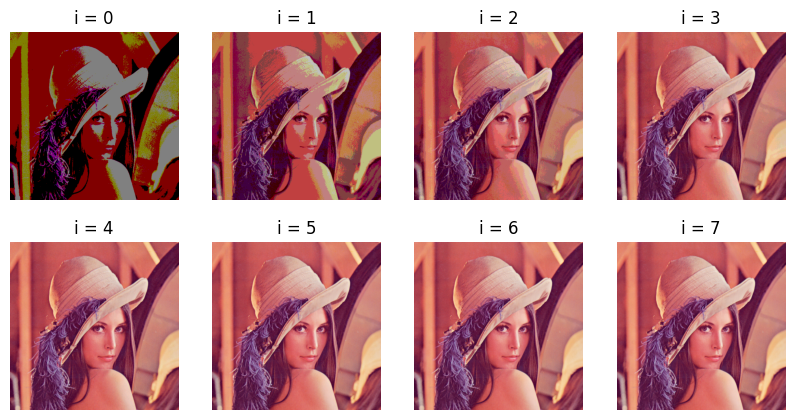

In [2]:
image = cv2.imread('./src_img/Lenna.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
for i in range(0, 8):
    max_val = 1<<(i+1)
    img = np.uint8(np.floor((image/256)*max_val)*(256//max_val))
    plt.subplot(2, 4, i+1)
    plt.title(f'i = {i}')
    plt.imshow(img)
    plt.axis('off')
plt.savefig('./out_img/Q1.png')

1. Larger number of bits for quantization preserve more detail.
2. Smaller number of bits for quantization introduce blockiness and noise.
3. The effect of quantization is more pronounced for images with fine details and subtle color variations.
4. MSB: We preserve the higher-order bits and discarding the lower-order bits. This approach determine the primary magnitude of the pixel values. LSB: We preserve the LSBs, which would result in a different type of quantization that often emphasizes the finer details of the image.

## 2

### 2.1

In [3]:
def histequalize(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    image_equalized = image_equalized.reshape(image.shape)
    return image_equalized.astype(np.uint8)

### 2.2

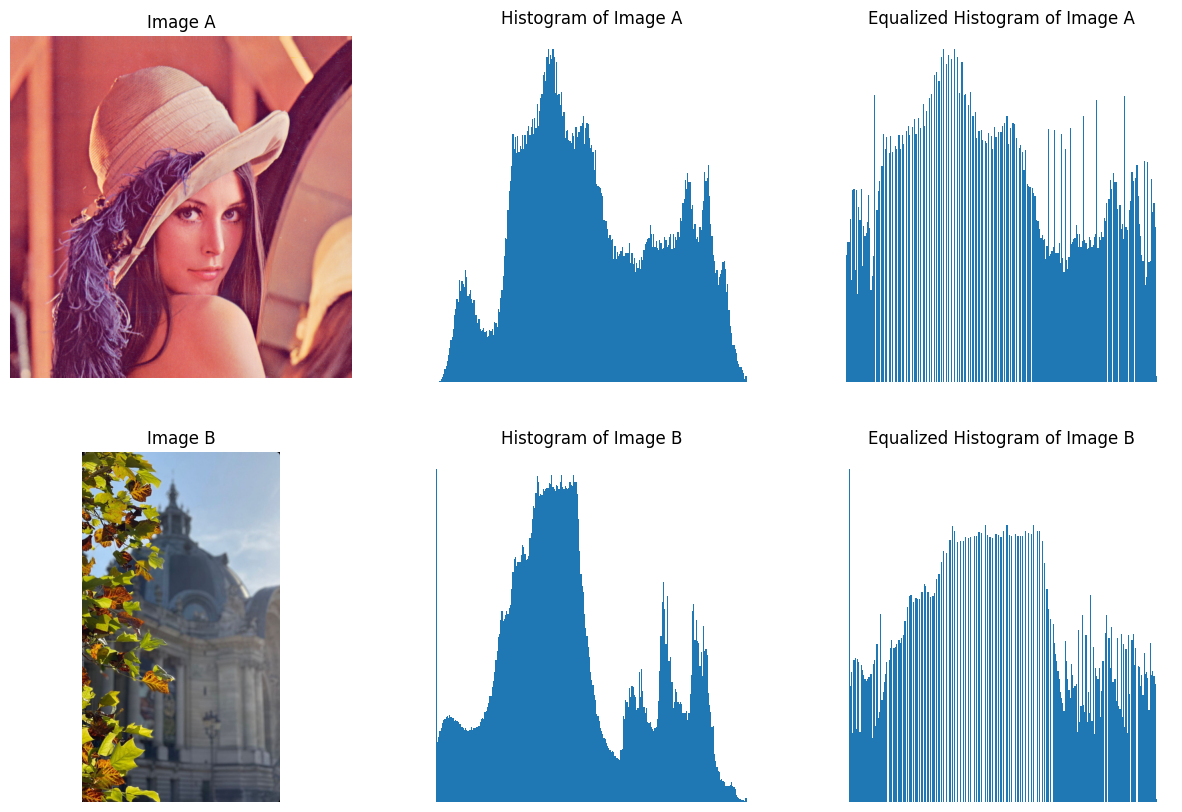

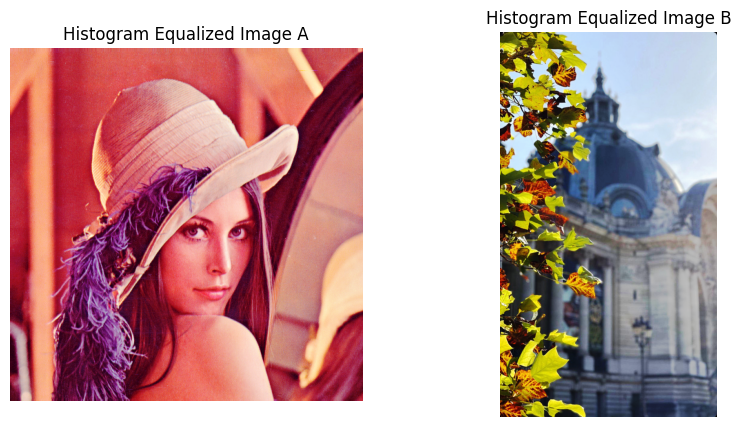

In [4]:
image_A = cv2.imread('./src_img/Lenna.png')
image_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
image_B = cv2.imread('./src_img/image.jpg')
image_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.title('Image A')
plt.imshow(image_A)
plt.axis('off')


plt.subplot(2, 3, 2)
plt.hist(image_A.ravel(), 256, [0, 256])
plt.title('Histogram of Image A')
plt.axis('off')

image1 = np.zeros_like(image_A)
image1 = histequalize(image_A)

plt.subplot(2, 3, 3)
plt.hist(image1.ravel(), 256, [0, 256])
plt.title('Equalized Histogram of Image A')
plt.axis('off')




plt.subplot(2, 3, 4)
plt.title('Image B')
plt.imshow(image_B)
plt.axis('off')


plt.subplot(2, 3, 5)
plt.hist(image_B.ravel(), 256, [0, 256])
plt.title('Histogram of Image B')
plt.axis('off')

image2 = np.zeros_like(image_B)
image2 = histequalize(image_B)

plt.subplot(2, 3, 6)
plt.hist(image2.ravel(), 256, [0, 256])
plt.title('Equalized Histogram of Image B')
plt.axis('off')
plt.savefig('./out_img/Q2_part2_image_histograms.png')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Histogram Equalized Image A')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Histogram Equalized Image B')
plt.axis('off')
plt.savefig('./out_img/Q2_part2_equalized_histograms.png')

Histogram equalization aims to redistribute the intensity values in an image to create a uniform histogram. This enhances contrast and improves image visibility, especially in cases where the original image has a skewed histogram.
However, when applied directly to colored images, histogram equalization can sometimes produce undesirable results because the technique treats each color channel (red, green, and blue) independently, potentially leading to color distortions.

### 2.3

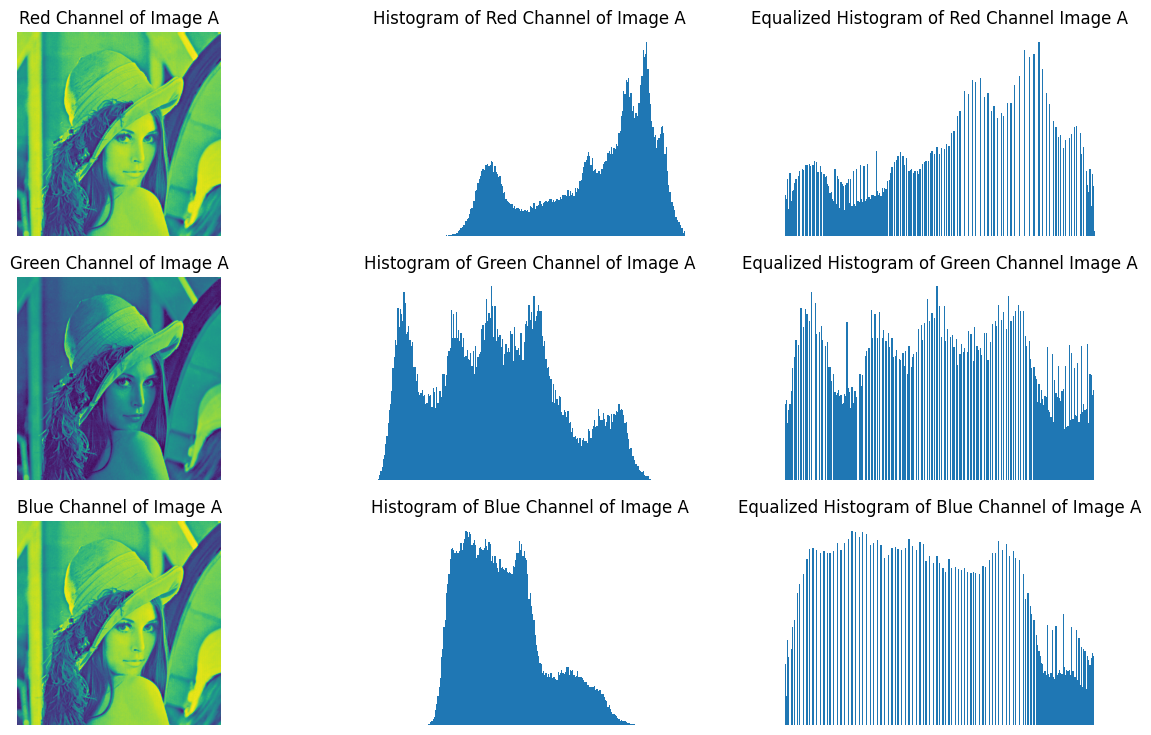

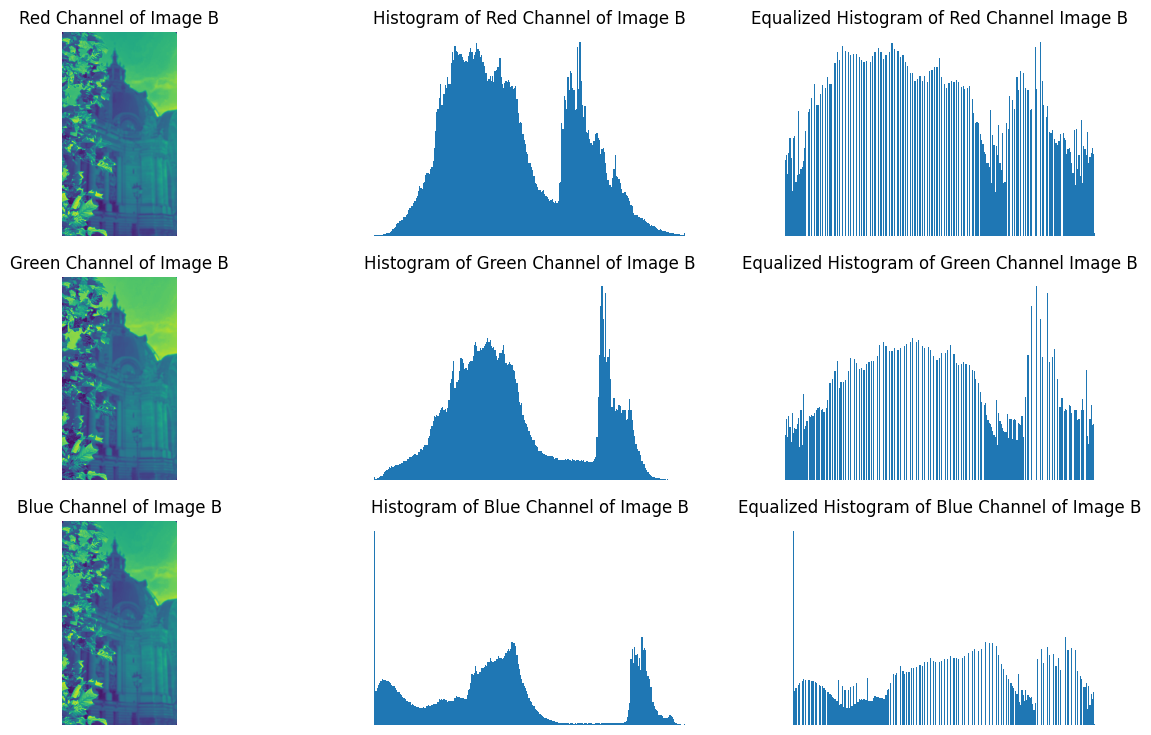

In [5]:
def plot_image_channels(image, index):
    plt.figure(figsize=(15, 9))
    plt.subplot(3, 3, 1)
    plt.title(f'Red Channel of Image {index}')
    plt.imshow(image[:, :, 0])
    plt.axis('off')


    plt.subplot(3, 3, 2)
    plt.hist(image[:, :, 0].ravel(), 256, [0, 256])
    plt.title(f'Histogram of Red Channel of Image {index}')
    plt.axis('off')

    image1 = np.zeros_like(image)
    image1 = histequalize(image[:, :, 0])

    plt.subplot(3, 3, 3)
    plt.hist(image1.ravel(), 256, [0, 256])
    plt.title(f'Equalized Histogram of Red Channel Image {index}')
    plt.axis('off')


    plt.subplot(3, 3, 4)
    plt.title(f'Green Channel of Image {index}')
    plt.imshow(image[:, :, 1])
    plt.axis('off')


    plt.subplot(3, 3, 5)
    plt.hist(image[:, :, 1].ravel(), 256, [0, 256])
    plt.title(f'Histogram of Green Channel of Image {index}')
    plt.axis('off')

    image2 = np.zeros_like(image)
    image2 = histequalize(image[:, :, 1])

    plt.subplot(3, 3, 6)
    plt.hist(image2.ravel(), 256, [0, 256])
    plt.title(f'Equalized Histogram of Green Channel Image {index}')
    plt.axis('off')



    plt.subplot(3, 3, 7)
    plt.title(f'Blue Channel of Image {index}')
    plt.imshow(image[:, :, 0])
    plt.axis('off')


    plt.subplot(3, 3, 8)
    plt.hist(image[:, :, 2].ravel(), 256, [0, 256])
    plt.title(f'Histogram of Blue Channel of Image {index}')
    plt.axis('off')

    image3 = np.zeros_like(image)
    image3 = histequalize(image[:, :, 2])

    plt.subplot(3, 3, 9)
    plt.hist(image3.ravel(), 256, [0, 256])
    plt.title(f'Equalized Histogram of Blue Channel of Image {index}')
    plt.axis('off')
    plt.savefig(f'./out_img/Q2_part3_{index}.png')




plot_image_channels(image_A, "A")
plot_image_channels(image_B, "B")

### 2.4

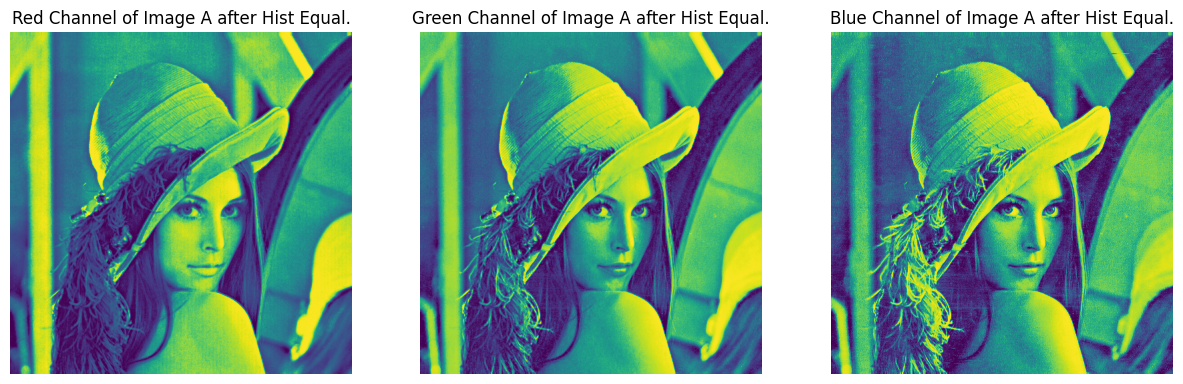

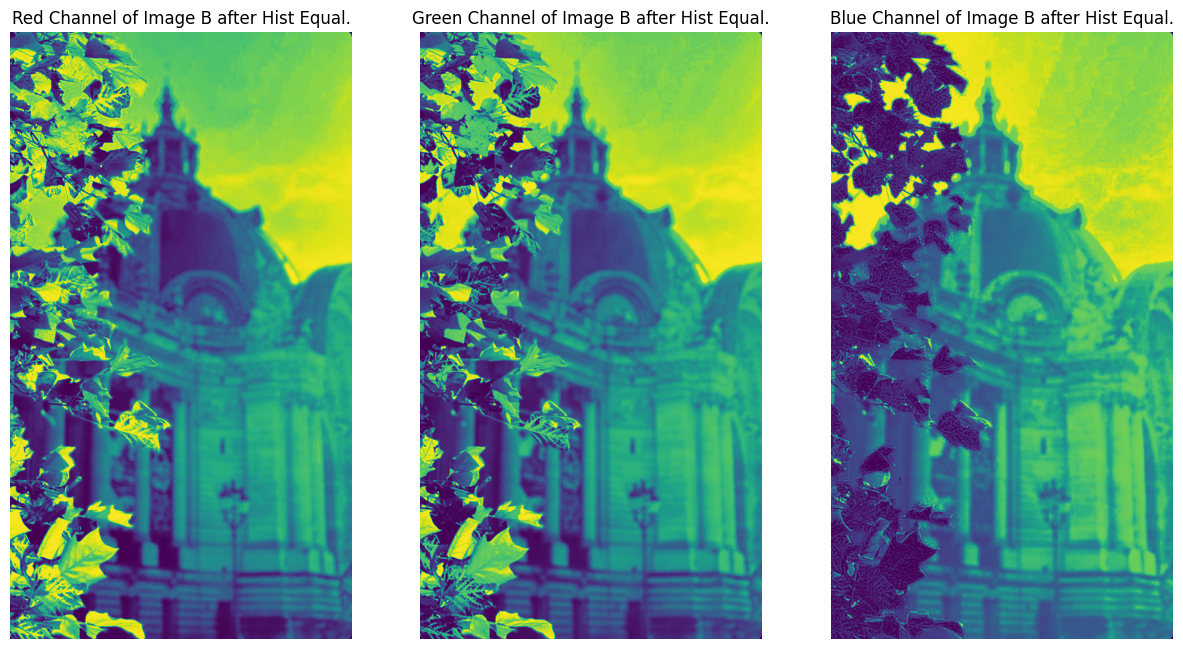

In [6]:
def plot_sep_channels(image, index):
    plt.figure(figsize=(15, 9))
    plt.subplot(1, 3, 1)
    plt.title(f'Red Channel of Image {index} after Hist Equal.')
    plt.imshow(histequalize(image[:, :, 0]))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f'Green Channel of Image {index} after Hist Equal.')
    plt.imshow(histequalize(image[:, :, 1]))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f'Blue Channel of Image {index} after Hist Equal.')
    plt.imshow(histequalize(image[:, :, 2]))
    plt.axis('off')
    plt.savefig(f'./out_img/Q2_part4_{index}.png')

plot_sep_channels(image_A, "A")
plot_sep_channels(image_B, "B")

### 2.5

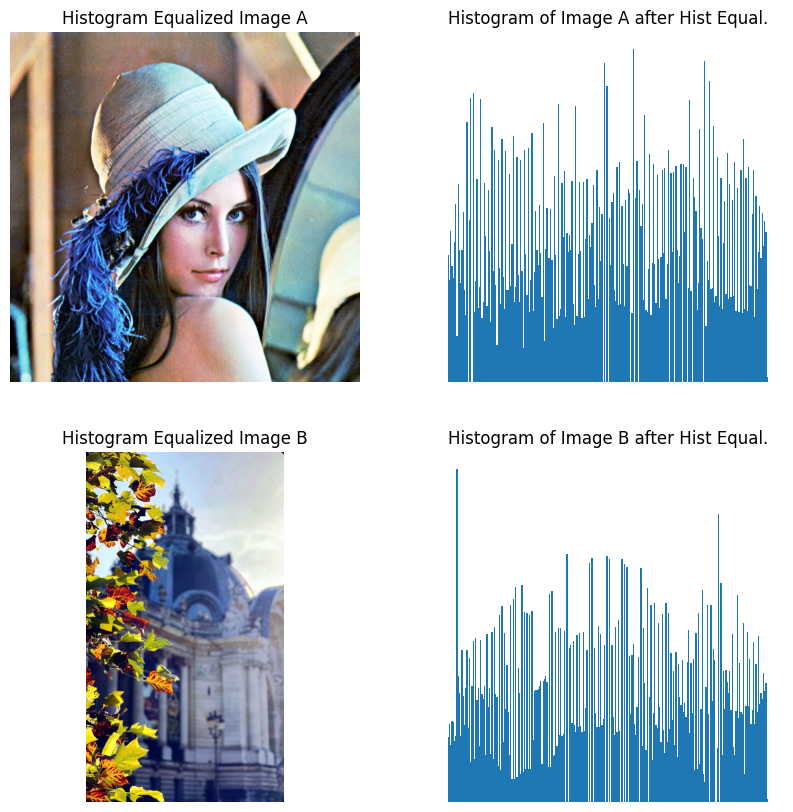

In [7]:
red_hist_A = histequalize(image_A[:, :, 0])
green_hist_A = histequalize(image_A[:, :, 1])
blue_hist_A = histequalize(image_A[:, :, 2])
image1 = np.zeros_like(image_A)
image1[:, :, 0] = red_hist_A
image1[:, :, 1] = green_hist_A
image1[:, :, 2] = blue_hist_A

red_hist_B = histequalize(image_B[:, :, 0])
green_hist_B = histequalize(image_B[:, :, 1])
blue_hist_B = histequalize(image_B[:, :, 2])
image2 = np.zeros_like(image_B)
image2[:, :, 0] = red_hist_B
image2[:, :, 1] = green_hist_B
image2[:, :, 2] = blue_hist_B

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Histogram Equalized Image A')
plt.imshow(image1)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histogram of Image A after Hist Equal.')
plt.hist(image1.ravel(), 256, [0, 256])
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title('Histogram Equalized Image B')
plt.imshow(image2)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Histogram of Image B after Hist Equal.')
plt.hist(image2.ravel(), 256, [0, 256])
plt.axis('off')

plt.savefig(f'./out_img/Q2_part5.png')

### 2.6

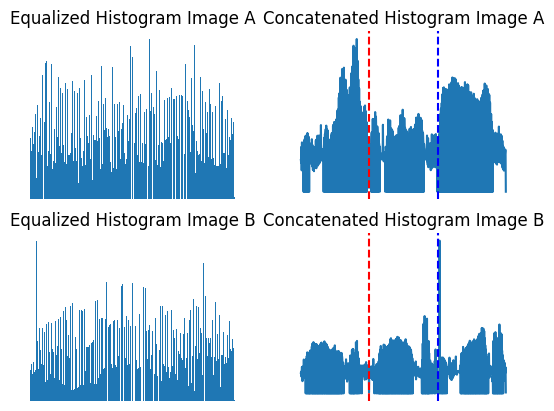

In [8]:
def plot_concatenated_image_channels(image, index):
    channels_concatenated = np.zeros(256*3, dtype = np.uint64)
    channels_concatenated[: 256] = np.bincount(image[:, :, 0].flatten(), minlength=256)
    channels_concatenated[256: 512] = np.bincount(image[:, :, 1].flatten(), minlength=256)
    channels_concatenated[512: ] = np.bincount(image[:, :, 2].flatten(), minlength=256)
    return channels_concatenated


plt.subplot(2, 2, 1)
plt.title('Equalized Histogram Image A')
plt.hist(image1.ravel(), 256, [0, 256])
plt.axis('off')

channels_A = plot_concatenated_image_channels(image1, "A")
plt.subplot(2, 2, 2)
plt.title('Concatenated Histogram Image A')
plt.plot(np.arange(768), channels_A)
plt.axvline(x=256, color='red', linestyle='--', label='Red to Green Transition')
plt.axvline(x=512, color='blue', linestyle='--', label='Green to Blue Transition')
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title('Equalized Histogram Image B')
plt.hist(image2.ravel(), 256, [0, 256])
plt.axis('off')


channels_B = plot_concatenated_image_channels(image2, "B")
plt.subplot(2, 2, 4)
plt.title('Concatenated Histogram Image B')
plt.plot(np.arange(768), channels_B)
plt.axvline(x=256, color='red', linestyle='--', label='Red to Green Transition')
plt.axvline(x=512, color='blue', linestyle='--', label='Green to Blue Transition')
plt.axis('off')

plt.savefig(f'./out_img/Q2_part6.png')

### 2.7

1. Histogram equalization can be a powerful tool for enhancing contrast in color images.
2. Applying equalization to individual color channels can help control color distortions.
3. Concatenating histograms can provide a comprehensive view of the color distribution in an image.
4. Understanding the limitations and potential drawbacks of histogram equalization is essential for effective image processing.

## 3. Who's the best?

### 3.1

(-0.5, 1671.5, 1279.5, -0.5)

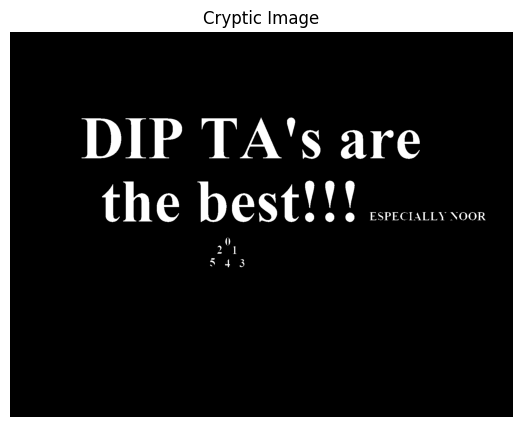

In [9]:
img_3 = cv2.imread('./src_img/5_mod.png')
crypt_img = np.zeros_like(img_3)
crypt_img[np.where(img_3%2 == 1)] = 255
cv2.imwrite("./out_img/Q3_part1_message.png", crypt_img)
plt.figure(figsize=(10, 5))
plt.title('Cryptic Image')
plt.imshow(crypt_img)
plt.axis('off')

### 3.2

<h2>DIP TA's are the best. Especially Noor.</h2>

### 3.3

In [10]:
x, y, channel = np.where(img_3%2 == 1)
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
print("Dimensions of the Decrypted Image are ", x_max-x_min, "*", y_max-y_min)
print("Dimensions of the Original Image are ", img_3.shape[0], "*", img_3.shape[1])

Dimensions of the Decrypted Image are  497 * 1342
Dimensions of the Original Image are  1280 * 1672


The reason why the cryptic image was weirdly proportioned is that the dimensions of the decrypted message is only 497 cross 1342 while the size of the image is 1280 cross 1672. This leads to imperfections in the embedding of the message in the base image because of Dimensionality inconsistencies, thereby leading to operations being performed on only a subset of pixels in the image, thereby leading to a weirdly proportioned image.  

### 3.4

<h3> The cryptic image was constructed using the concept of quantization. For each pixel, only 1 bit is for used for representation. What was actually done in order to encode the image was to take only the LSB of each and every pixel value. Since the value of the bit can only be 1 or 0, a one-to-one mapping was constructed which mapped 0 to a value of 0 only, and 1 to 255, which indicated completely black and completely white pixels. The message was embedded in the form of white pixels in the image and rest of the pixels were turned 0 so that message after decryption is clearly visible. </h3>

### 3.5

In [11]:
def crypt(base_image, message_image):
    base_image = base_image.astype(np.uint8)
    message_image = message_image.astype(np.uint8)
    base_image_lsb_cleared = base_image & ~1                                # Clear the LSB of the base image
    encrypted_image = base_image_lsb_cleared | (message_image >> 7)         # Insert the message image's most significant bit into the LSB of the base image
    return encrypted_image

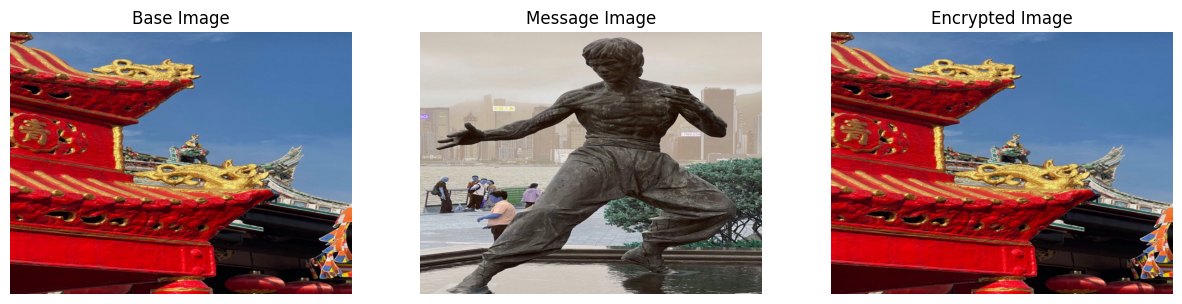

In [12]:
def convert_scale(image):
    abs_image = np.abs(image)
    max_val = np.max(abs_image)
    if max_val == 0:
        scaled_image = np.zeros_like(abs_image, dtype=np.uint8)
    else:
        scaled_image = (abs_image / max_val * 255).astype(np.uint8)
    return scaled_image


base_image = cv2.imread("./src_img/5_mod.png")
message_img = cv2.imread('./src_img/1_mod.png')
base_image = cv2.resize(base_image, (message_img.shape[1], message_img.shape[0]))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Base Image')
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.axis('off')


plt.subplot(1, 3, 2)
plt.title('Message Image')
plt.imshow(message_img)
plt.axis('off')

encrypted_image = crypt(base_image, message_img)
encrypted_image = convert_scale(encrypted_image)
plt.subplot(1, 3, 3)
plt.title('Encrypted Image')
plt.imshow(cv2.cvtColor(encrypted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.savefig(f'./out_img/Q3_part5.png')

### 3.6

In [13]:
def decrypt(encrypted_image):
    extracted_message = (encrypted_image & 1) << 7              # Extract the LSB of the encrypted image and shift it back to reconstruct the message image
    return extracted_message

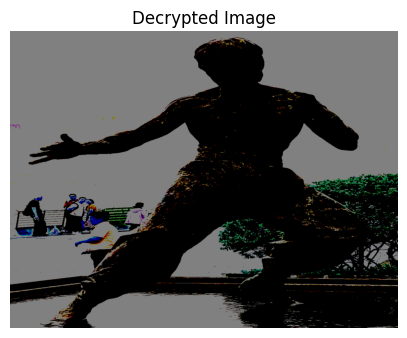

In [14]:
plt.figure(figsize=(5, 5))
plt.title('Decrypted Image')
plt.imshow(decrypt(encrypted_image))
plt.axis('off')
plt.savefig(f'./out_img/Q3_part6.png')

## 4. 

(-0.5, 720.5, 1279.5, -0.5)

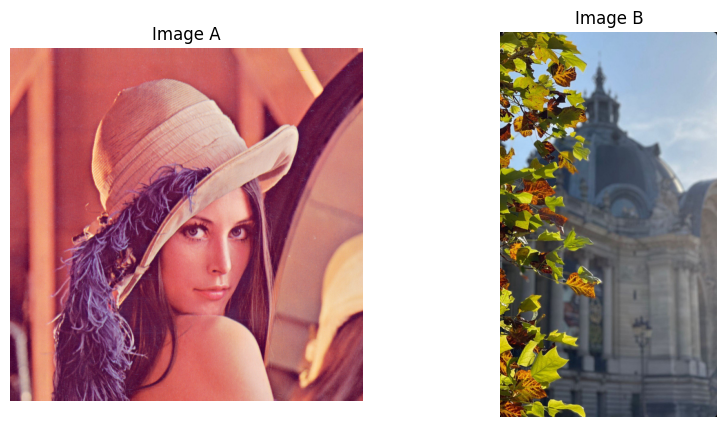

In [15]:
image_A = cv2.imread('./src_img/Lenna.png')
image_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image A')
plt.imshow(image_A)
plt.axis('off')

image_B = cv2.imread('./src_img/image.jpg')
image_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.title('Image B')
plt.imshow(image_B)
plt.axis('off')

### 4.1

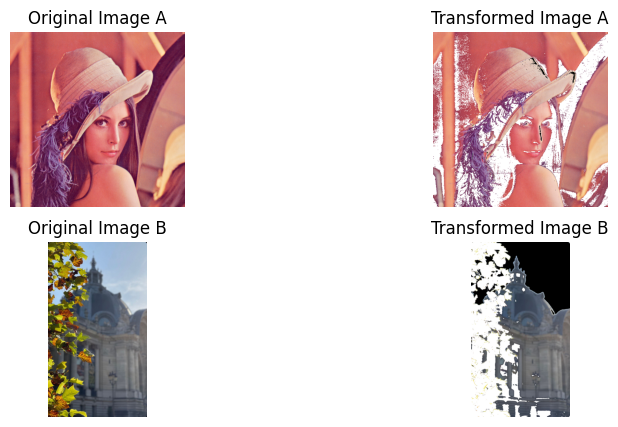

In [16]:
### Roll No. is 2021101095, therefore a = 5
a = 5
def linear_transform(img):
    new_img = np.zeros_like(img)
    ## Red Channel
    coordinates1 = img[:, :, 0] <= 100
    condition1 = img[:, :, 0] <= 200
    condition2 = img[:, :, 0] > 100
    coordinates2 = np.where(condition1 & condition2)
    coordinates3 = img[:, :, 0] > 200
    new_img[coordinates1] = img[coordinates1]+a
    new_img[coordinates2] = np.uint8(img[coordinates2]/a)+2*a
    new_img[coordinates3] = 255

    ## Green Channel
    coordinates1 = np.where(img[:, :, 1] <= 128)
    coordinates2 = np.where(img[:, :, 1] > 128)
    new_img[coordinates1] = np.minimum(5*img[coordinates1]+1, 255)
    new_img[coordinates2] = np.uint8(img[coordinates2]/a)+8

    ## Blue Channel
    coordinates1 = img[:, :, 2] <= 75
    condition1 = img[:, :, 2] <= 200
    condition2 = img[:, :, 2] > 75
    coordinates2 = np.where(condition1 & condition2)
    coordinates3 = img[:, :, 2] > 200
    new_img[coordinates1] = 255
    new_img[coordinates2] = img[coordinates2]
    new_img[coordinates3] = 0
    return new_img

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('Original Image A')
plt.imshow(image_A)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Transformed Image A')
plt.imshow(linear_transform(image_A))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original Image B')
plt.imshow(image_B)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Transformed Image B')
plt.imshow(linear_transform(image_B))
plt.axis('off')
plt.savefig(f'./out_img/Q4_part1.png')

### 4.2

Red: y = 0.04541345020059965x + 202.14556097378497
Green: y = -0.20035022072335262x + 166.79159591648997
Blue: y = -0.47883763790250716x + 196.6102715971036


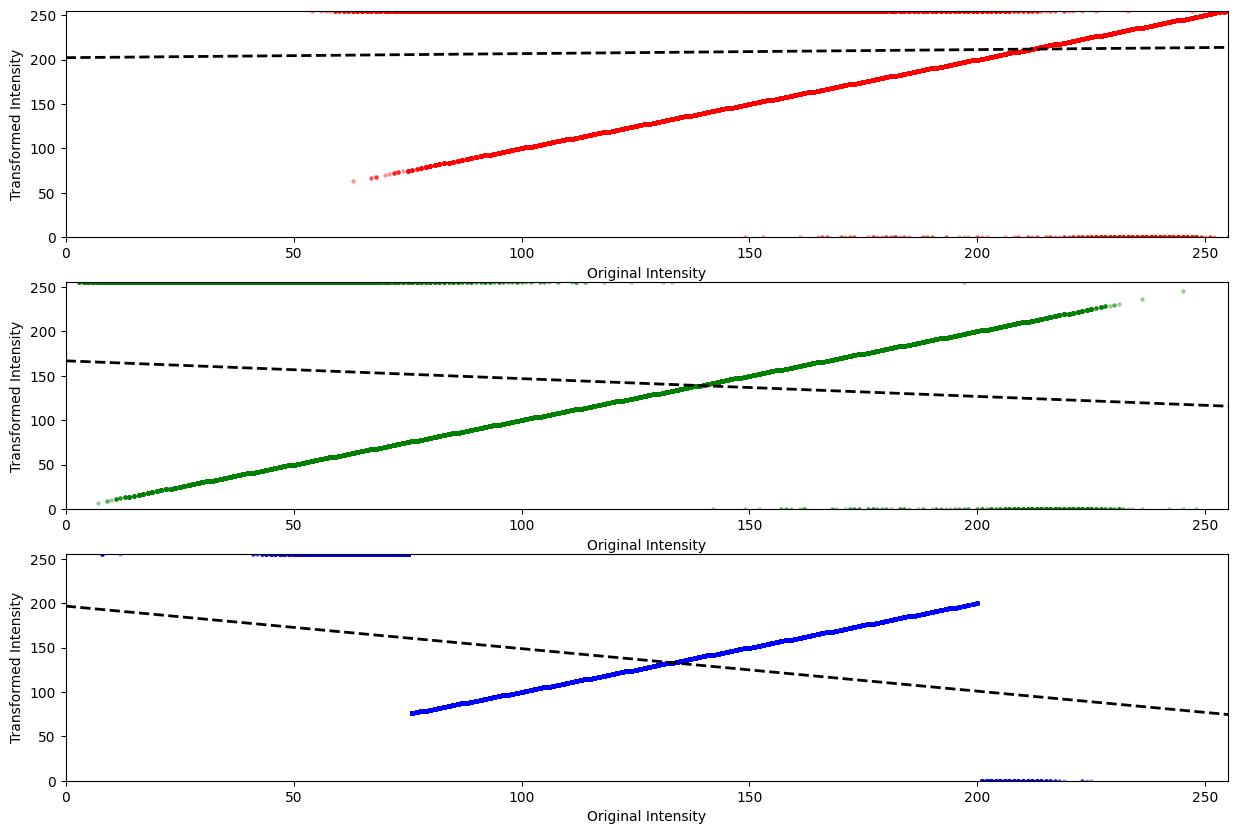

Red: y = -0.6092376583512851x + 197.32617697626412
Green: y = -0.9313979647359711x + 238.14179437045132
Blue: y = -1.2064114134696824x + 259.5663173580734


<Figure size 640x480 with 0 Axes>

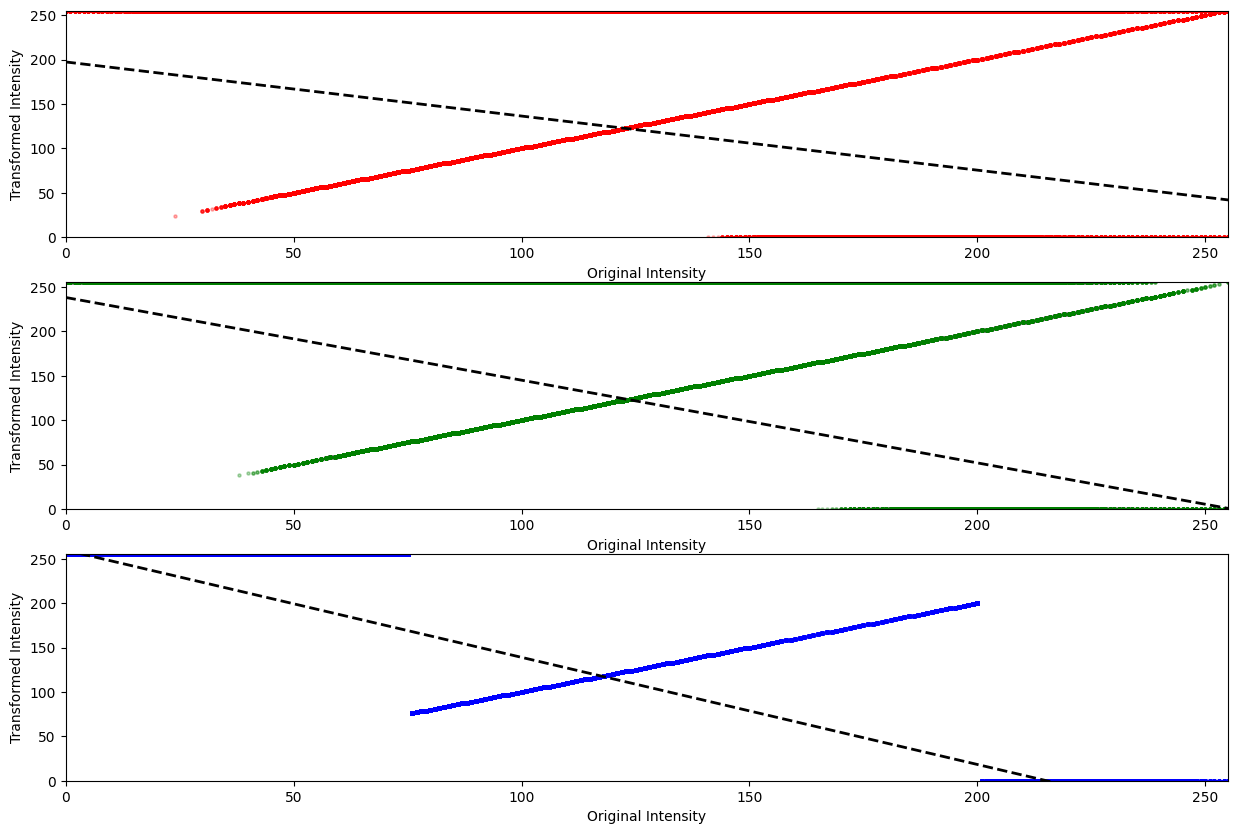

<Figure size 640x480 with 0 Axes>

In [17]:
def plot_channel_transformation(original_channel, transformed_channel, color, title):
    original_flat = original_channel.flatten()
    transformed_flat = transformed_channel.flatten()
    plt.scatter(original_flat, transformed_flat, color=color, alpha=0.3, s=5)
    X = np.vstack([original_flat, np.ones(len(original_flat))]).T
    coefficients, residuals, rank, s = np.linalg.lstsq(X, transformed_flat, rcond=None)
    line_of_best_fit = coefficients[0]*np.arange(256)+coefficients[1]
    plt.plot(np.arange(256), line_of_best_fit, color='black', linestyle='--', linewidth=2)
    plt.xlabel('Original Intensity')
    plt.ylabel('Transformed Intensity')
    plt.xlim([0, 255])
    plt.ylim([0, 255])
    print(f"{title}: y = {coefficients[0]}x + {coefficients[1]}")


def plot_image(image, index):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    image1 = linear_transform(image)

    red_channel_transform = image1[:, :, 0]
    green_channel_transform = image1[:, :, 1]
    blue_channel_transform = image1[:, :, 2]

    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    plot_channel_transformation(red_channel, red_channel_transform, 'red', 'Red')
    plt.subplot(3, 1, 2)
    plot_channel_transformation(green_channel, green_channel_transform, 'green', 'Green')
    plt.subplot(3, 1, 3)
    plot_channel_transformation(blue_channel, blue_channel_transform, 'blue', 'Blue')
    plt.show()
    plt.savefig(f'./out_img/Q4_part2_{index}.png')


plot_image(image_A, "A")
plot_image(image_B, "B")

### 4.3

Red: y = 0.04541345020059965x + 202.14556097378497
Green: y = -0.20035022072335262x + 166.79159591648997
Blue: y = -0.47883763790250716x + 196.6102715971036


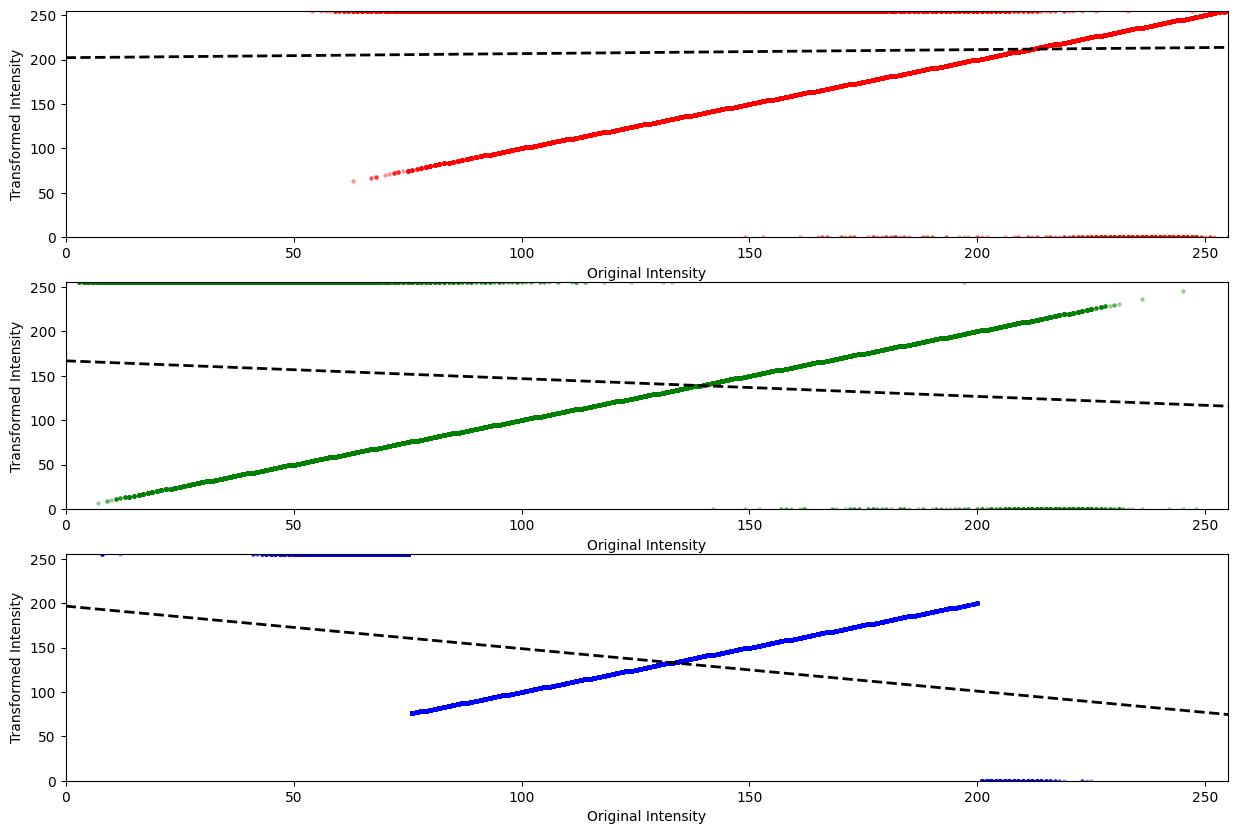

Red: y = -0.6092376583512851x + 197.32617697626412
Green: y = -0.9313979647359711x + 238.14179437045132
Blue: y = -1.2064114134696824x + 259.5663173580734


<Figure size 640x480 with 0 Axes>

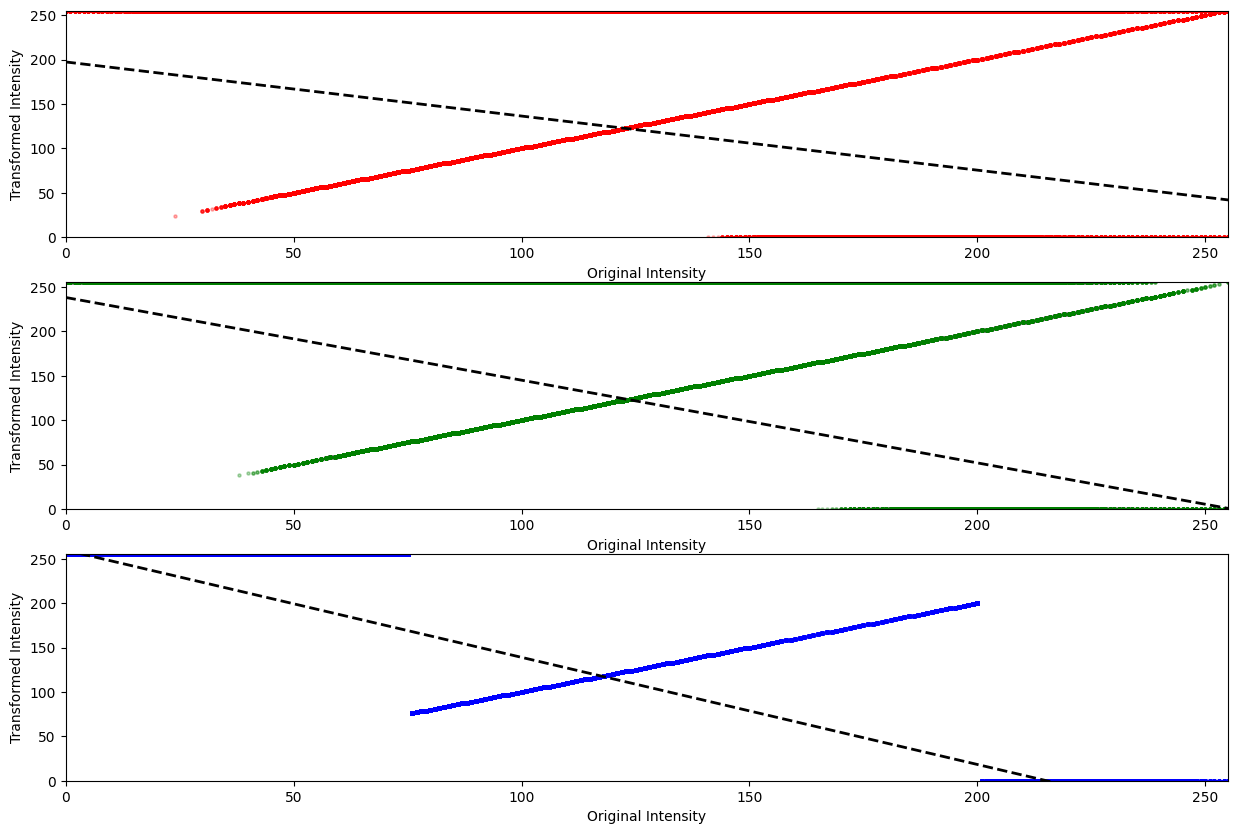

<Figure size 640x480 with 0 Axes>

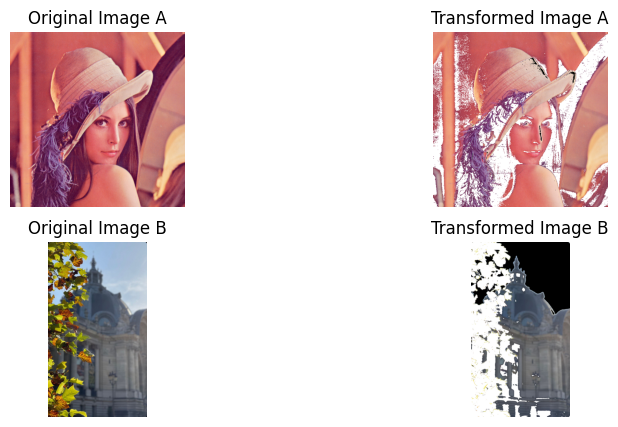

In [18]:
plot_image(image_A, "A")
plot_image(image_B, "B")

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('Original Image A')
plt.imshow(image_A)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Transformed Image A')
plt.imshow(linear_transform(image_A))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original Image B')
plt.imshow(image_B)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Transformed Image B')
plt.imshow(linear_transform(image_B))
plt.axis('off')

plt.savefig(f'./out_img/Q4_part3.png')

Image A: 
Red Channel: The strong positive correlation and the diagonal line suggest a simple scaling or offset transformation. Since the image background is reddish, therefore, based upon the neighbourhood pixel intensity values, all the pixels of the red channel in line of best fit are adjusted to a value of 200 and above signifying a strong reddish color in the mod_trans image.
Green Channel and Blue Channel: The negative correlation and the diagonal line suggest a reversal of intensities, possibly a negation. It is because, the image A is reddish in color with low values across Green and Blue Channels, thus signifying a smaller value when the larger values of blue channels are encountered so that image appears reddish based upon the line of best fit.

Image B:
Red, Blue and Green Channel: Since the image in general is lightish in color and very bright in appearance, which signifies that a pixel having very high values of any channel, should be penalised. That is what is done by the lines of best fit obtained across all 3 channels. As the values of pixel intensities increase, in order to make the pixel intensities smaller and lighter, the pixel intensities are penalised highly, and thus the negative slope.

Potential Applications:
Contrast enhancement: The scaling transformation in the top plot could be used to increase or decrease the contrast of an image.
Image inversion: The negation transformation in the middle plot could be used to invert the colors of an image.

### 4.4

Red: y = 0.04541345020059965x + 202.14556097378497
Green: y = -0.20035022072335262x + 166.79159591648997
Blue: y = -0.47883763790250716x + 196.6102715971036
Red: y = -0.6092376583512851x + 197.32617697626412
Green: y = -0.9313979647359711x + 238.14179437045132
Blue: y = -1.2064114134696824x + 259.5663173580734


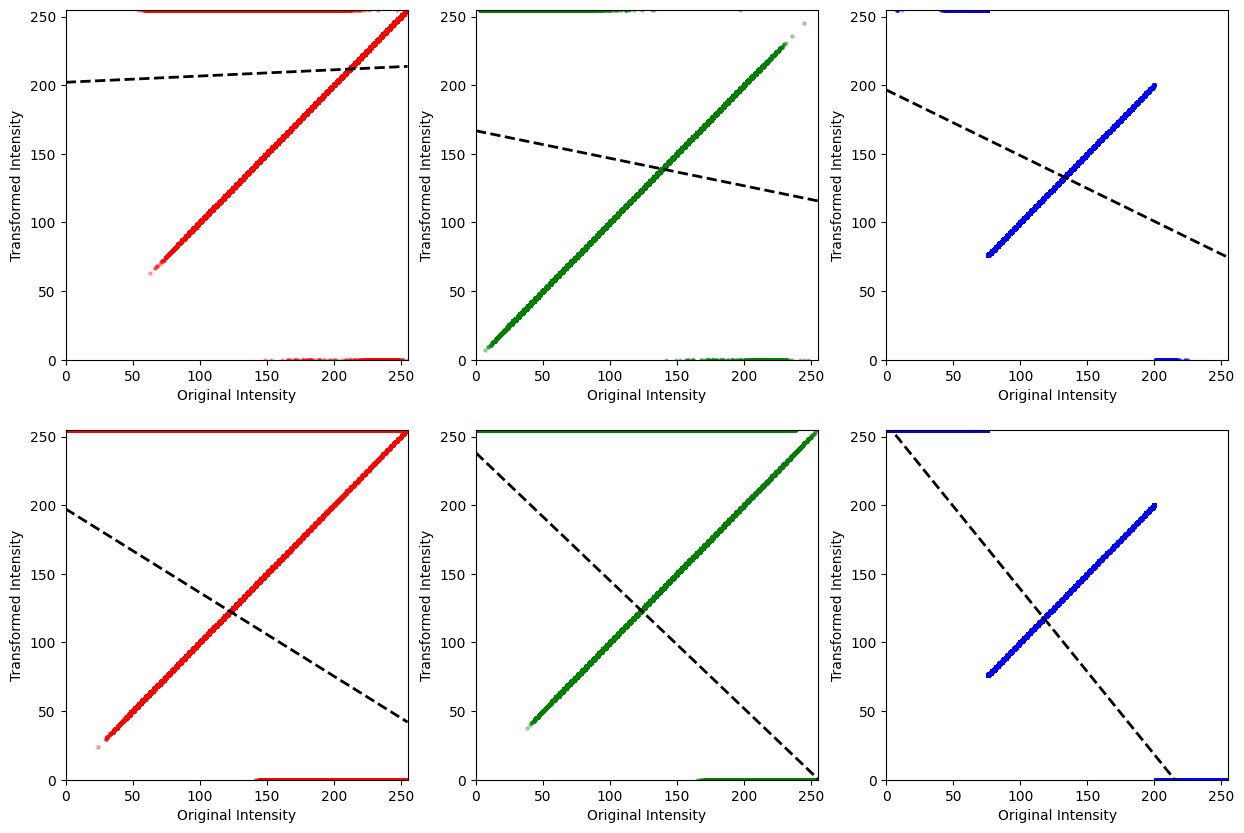

<Figure size 640x480 with 0 Axes>

In [19]:
red_channel_A = image_A[:, :, 0]
green_channel_A = image_A[:, :, 1]
blue_channel_A = image_A[:, :, 2]
image1 = linear_transform(image_A)

red_channel_transform_A = image1[:, :, 0]
green_channel_transform_A = image1[:, :, 1]
blue_channel_transform_A = image1[:, :, 2]

red_channel_B = image_B[:, :, 0]
green_channel_B = image_B[:, :, 1]
blue_channel_B = image_B[:, :, 2]
image2 = linear_transform(image_B)

red_channel_transform_B = image2[:, :, 0]
green_channel_transform_B = image2[:, :, 1]
blue_channel_transform_B = image2[:, :, 2]

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plot_channel_transformation(red_channel_A, red_channel_transform_A, 'red', 'Red')
plt.subplot(2, 3, 2)
plot_channel_transformation(green_channel_A, green_channel_transform_A, 'green', 'Green')
plt.subplot(2, 3, 3)
plot_channel_transformation(blue_channel_A, blue_channel_transform_A, 'blue', 'Blue')
plt.subplot(2, 3, 4)
plot_channel_transformation(red_channel_B, red_channel_transform_B, 'red', 'Red')
plt.subplot(2, 3, 5)
plot_channel_transformation(green_channel_B, green_channel_transform_B, 'green', 'Green')
plt.subplot(2, 3, 6)
plot_channel_transformation(blue_channel_B, blue_channel_transform_B, 'blue', 'Blue')
plt.show()

plt.savefig(f'./out_img/Q4_part4.png')

### 4.5

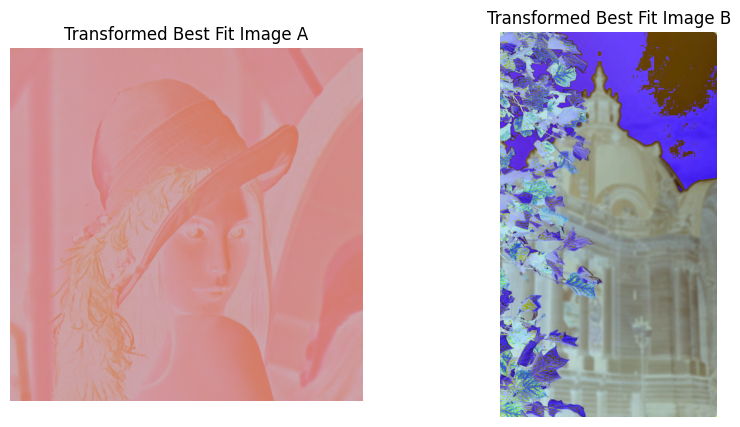

In [20]:
def transform_best_fit_A(image):
    image_A = np.zeros_like(image)
    image_A[:, :, 0] = 0.045*image[:, :, 0] + 202.15
    image_A[:, :, 1] = -0.200*image[:, :, 1] + 166.79
    image_A[:, :, 2] = -0.479*image[:, :, 2] + 196.61
    image_A = np.uint8(image_A)
    return image_A


def transform_best_fit_B(image):
    image_B = np.zeros_like(image)
    image_B[:, :, 0] = -0.609*image[:, :, 0]+197.326
    image_B[:, :, 1] = -0.931*image[:, :, 1]+238.142
    image_B[:, :, 2] = -1.206*image[:, :, 2]+259.566
    image_B = np.uint8(image_B)
    return image_B

mod_trans_A = transform_best_fit_A(image_A)
mod_trans_B = transform_best_fit_B(image_B)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Transformed Best Fit Image A')
plt.imshow(mod_trans_A)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Transformed Best Fit Image B')
plt.imshow(mod_trans_B)
plt.axis('off')
plt.savefig(f'./out_img/Q4_part5.png')

### 4.6

In [21]:
transformed_A = linear_transform(image_A)
transformed_B = linear_transform(image_B)

Red: y = 0.0030430905367263795x + 209.1324377990119
Green: y = 0.02347239288977762x + 142.94010767985435
Blue: y = 0.06599338088555003x + 135.97359898106566


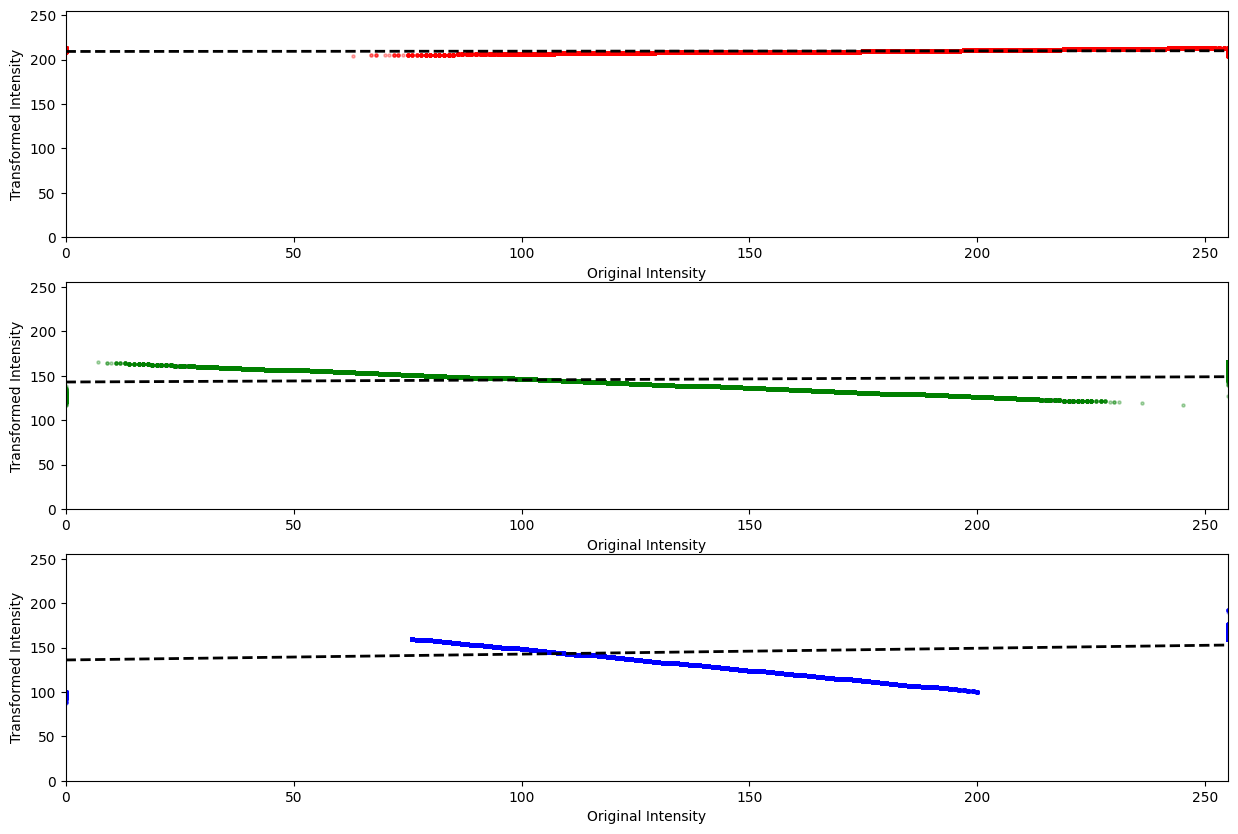

Red: y = 0.09741083094524944x + 115.32859784132047
Green: y = 0.27951434734363634x + 93.42384928247647
Blue: y = 0.15379873890683488x + 136.2755100270261


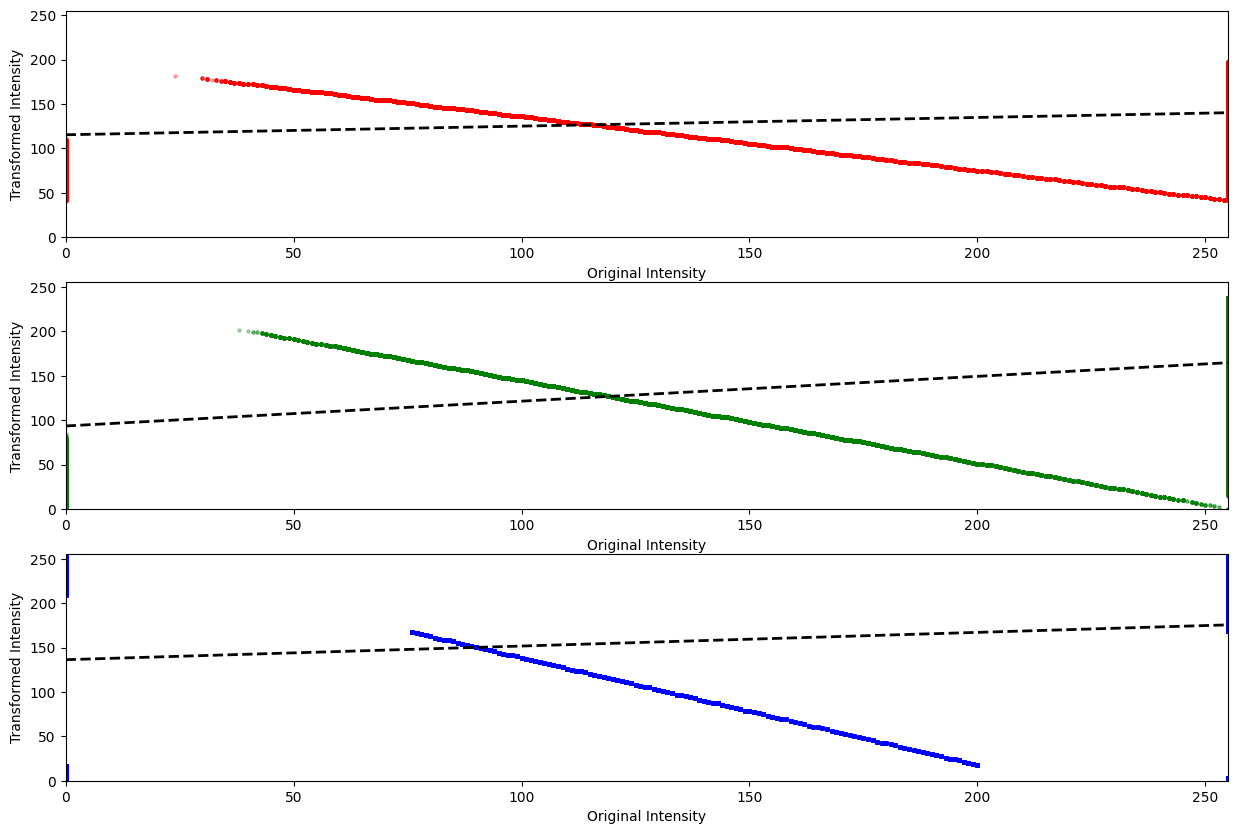

<Figure size 640x480 with 0 Axes>

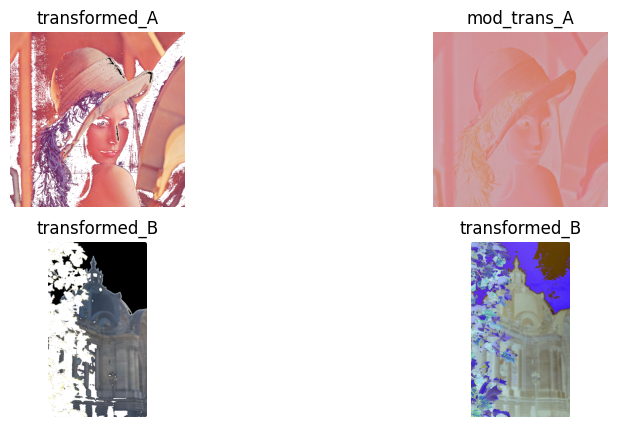

In [22]:
red_channel = transformed_A[:, :, 0]
green_channel = transformed_A[:, :, 1]
blue_channel = transformed_A[:, :, 2]

red_channel_transform = mod_trans_A[:, :, 0]
green_channel_transform = mod_trans_A[:, :, 1]
blue_channel_transform = mod_trans_A[:, :, 2]

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plot_channel_transformation(red_channel, red_channel_transform, 'red', 'Red')
plt.subplot(3, 1, 2)
plot_channel_transformation(green_channel, green_channel_transform, 'green', 'Green')
plt.subplot(3, 1, 3)
plot_channel_transformation(blue_channel, blue_channel_transform, 'blue', 'Blue')
plt.show()


red_channel = transformed_B[:, :, 0]
green_channel = transformed_B[:, :, 1]
blue_channel = transformed_B[:, :, 2]

red_channel_transform = mod_trans_B[:, :, 0]
green_channel_transform = mod_trans_B[:, :, 1]
blue_channel_transform = mod_trans_B[:, :, 2]

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plot_channel_transformation(red_channel, red_channel_transform, 'red', 'Red')
plt.subplot(3, 1, 2)
plot_channel_transformation(green_channel, green_channel_transform, 'green', 'Green')
plt.subplot(3, 1, 3)
plot_channel_transformation(blue_channel, blue_channel_transform, 'blue', 'Blue')
plt.show()
plt.savefig(f'./out_img/Q4_part6_plots.png')



plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('transformed_A')
plt.imshow(transformed_A)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('mod_trans_A')
plt.imshow(mod_trans_A)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('transformed_B')
plt.imshow(transformed_B)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('transformed_B')
plt.imshow(mod_trans_B)
plt.axis('off')
plt.savefig(f'./out_img/Q4_part6_images.png')

### 4.7

The difference between the 2 images transformed_A and mod_trans_A is that the first image was a bit distorted and as a result of the discontinuous pixel linear transformations, the image had become very rough in the sense that there were many irregularities in the image, which were gradually smoothened out after performing this procedure. The White pixels which appeared in the image were also given a pixel intensity based upon the line of best fit which led to the gradual smoothening of the image. A similar observation goes for the second image where white pixels are replaced by colorful petals and also the walls of the building are now easily identifiable and clearer. Since, the image pixels are smoothened out based upon the pixels in the neighbourhood, we can say that this transformation can be referred to as a filter because this is what a filter does, based upon neighbourhood pixels, smoothen out the image. 